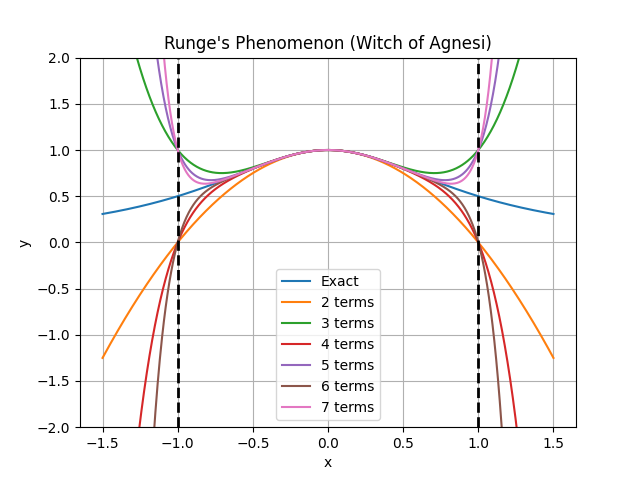

In [8]:
"""agnesi_witch.ipynb"""
# Cell 1 - Show result of f(z) on complexes where Re(z) >= 0
#Used Dave's Code

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

# Agnesi's Witch function (simplified equation)
def f(x: NDArray[np.float_]) -> NDArray[np.float_]:
    return 1 / (1 + x ** 2)

# Power Series for f(x)
def p_f(x: float, num_terms: int) -> float:
    # Initialize the variable y as 0.0
    y: float = 0.0
    
    # Loop over the range of num_terms
    for n in range(num_terms):
        # Update y by adding the value of ((-(x ** 2)) ** n)
        y += ((-(x ** 2)) ** n)
    return y

# Create a figure and axes
fig: plt.Figure = plt.figure() # Create a new figure
ax: Axes = fig.add_subplot() # Add a cubplot to the figure

# Define the x values
x: NDArray[np.float_] = np.linspace(-1.5, 1.5, 1000)

# Plot the exact formula
ax.plot(x, f(x), label="Exact") # Plot the function f(x)

# Plot the power series with increasing number of terms
v = np.vectorize(p_f, excluded=("num_terms",)) # Vectorize the p_f function
for n in range(2, 8):
    ax.plot(x, v(x, num_terms=n), label=f"{n} terms") # Plot the power series

# Set the title, labels, legend, and grid
ax.set_title("Runge's Phenomenon (Witch of Agnesi)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc="best") # Add a legend to the plot
ax.grid() # Add grid lines to the plot
ax.set_ylim(-2, 2) # Set the y-axis limits

# Add vertical lines at x = -1 and x = 1
ax.axvline(x=-1, color="black", linestyle="--", linewidth=2) # Add a vertical line at x = -1
ax.axvline(x=1, color="black", linestyle="--", linewidth=2) # Add a vertical line at x = 1

# Show the plot
plt.show()
